In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# # import the satellite data
X_train = pd.read_csv('X_train_sat4.csv', header=None).values.reshape(
    [400000, 28, 28, 4])
Y_train = pd.read_csv('y_train_sat4.csv', header=None)
X_test = pd.read_csv('X_test_sat4.csv', header=None).values.reshape(
    [100000, 28, 28, 4])
Y_test = pd.read_csv('y_test_sat4.csv', header=None)

# normalise data
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()


In [3]:
def convert_encoded_to_value(df):
    df.loc[:, 'Name'] = np.zeros(len(df))
    df.loc[:, 'Name'][df[0] == 1] = 'Barren_Land'
    df.loc[:, 'Name'][df[1] == 1] = 'Trees'
    df.loc[:, 'Name'][df[2] == 1] = 'Grassland'
    df.loc[:, 'Name'][df[3] == 1] = 'Other'
    return df['Name']


C:\Users\serik\AppData\Local\Temp\ipykernel_6508\3250312390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Name'][df[0] == 1] = 'Barren_Land'


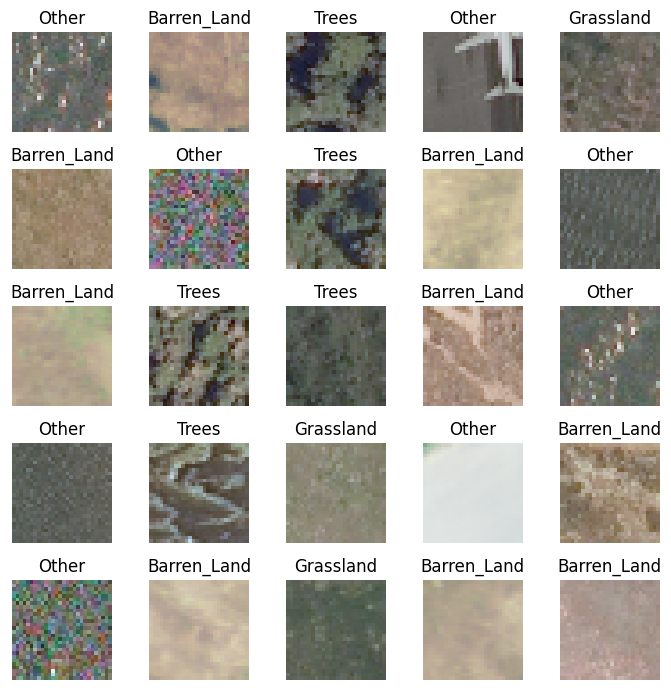

In [4]:
Y_name = convert_encoded_to_value(Y_train.copy())
fig = plt.figure(figsize=(7, 7))
for num, X, name in zip(np.arange(1, 26), X_train, Y_name):
    ax = fig.add_subplot(5, 5, num)
    ax.imshow(X[:, :, :3])
    ax.axis('off')
    ax.set_title(name)
plt.tight_layout()


In [5]:
def extract_features(data):
    features = []
    for i in range(data.shape[0]):
        features.append([])
        for j in range(data.shape[3]):
            features[i].append(data[i, :, :, j].sum() / (28*28))
            features[i].append(data[i, :, :, j].min())
            features[i].append(data[i, :, :, j].max())
    return features


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns


clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(extract_features(X_train), Y_train)
dt_pred = np.array(clf.predict(extract_features(X_test)))


In [7]:
confusion_matrix = metrics.confusion_matrix(
    Y_test.values.argmax(axis=1), dt_pred.argmax(axis=1))


In [8]:
print("Accuracy - ", end="")
print(metrics.accuracy_score(Y_test.values.argmax(axis=1), dt_pred.argmax(axis=1)))


Accuracy - 0.99395


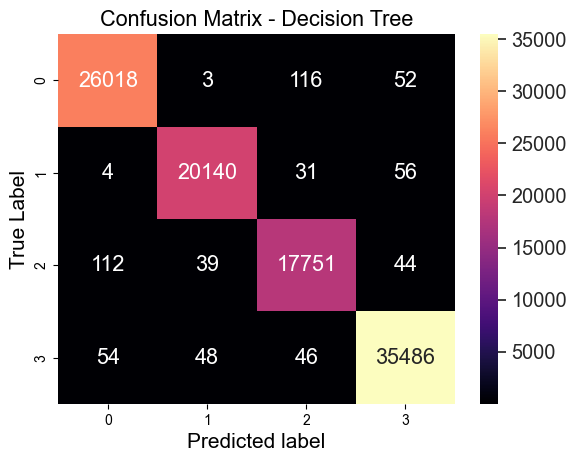

<Figure size 1000x700 with 0 Axes>

In [9]:
matrix_df = pd.DataFrame(confusion_matrix)  # plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax,
            cmap="magma")  # set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
